# **Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


# **Import File**

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop rows with NaN in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)
df = df.dropna(subset=['TotalCharges', 'Churn']) # added for decision tree
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# **Clean Data**




In [ ]:
# Drop Customerid
df = df.drop('customerID', axis=1)

In [ ]:
# check for missing values
print(df.isnull().sum())

# check for duplicates
print(df.duplicated().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
22


# **Random Search**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Convert categorical features to numerical using one-hot encoding
df_processed = pd.get_dummies(df, drop_first=True)

# Assuming 'Churn_Yes' is the target variable after one-hot encoding
X = df_processed.drop('Churn_Yes', axis=1)
y = df_processed['Churn_Yes'].astype(int)

num_features = X.select_dtypes(include=['int64', 'float64', 'uint8', 'bool']).columns
cat_features = X.select_dtypes(include=['object']).columns # Should be empty after get_dummies

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000)

# define hyperparameter space
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

#RandomSearch
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.08858667904100823)}
Best CV Accuracy: 0.8087111111111112


In [ ]:
print(df_processed.head(15))

    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0               0       1           29.85         29.85        False   
1               0      34           56.95       1889.50         True   
2               0       2           53.85        108.15         True   
3               0      45           42.30       1840.75         True   
4               0       2           70.70        151.65        False   
5               0       8           99.65        820.50        False   
6               0      22           89.10       1949.40         True   
7               0      10           29.75        301.90        False   
8               0      28          104.80       3046.05        False   
9               0      62           56.15       3487.95         True   
10              0      13           49.95        587.45         True   
11              0      16           18.95        326.80         True   
12              0      58          100.35       5681.10         

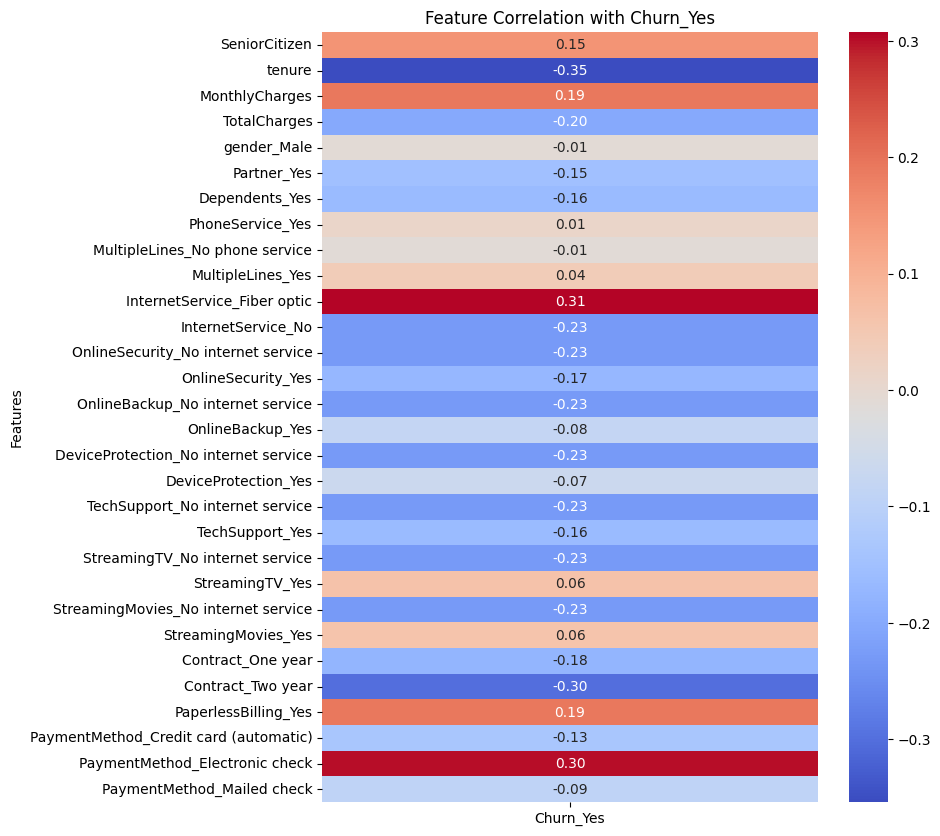

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn correlations
churn_correlations = df_processed.corr()['Churn_Yes'].drop('Churn_Yes')

# Create a heatmap of the churn correlations
plt.figure(figsize=(8, 10))
sns.heatmap(churn_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Feature Correlation with Churn_Yes')
plt.ylabel('Features')
plt.yticks(rotation=0)
plt.show()

# **Model 1: Logistic model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model with the best parameters
best_log_reg = LogisticRegression(solver=random_search.best_params_['solver'],
                                  penalty=random_search.best_params_['penalty'],
                                  C=random_search.best_params_['C'],
                                  max_iter=1000)

best_log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7882018479033405
Confusion Matrix:
[[918 115]
 [183 191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# **Logistic Confusion Matrix**

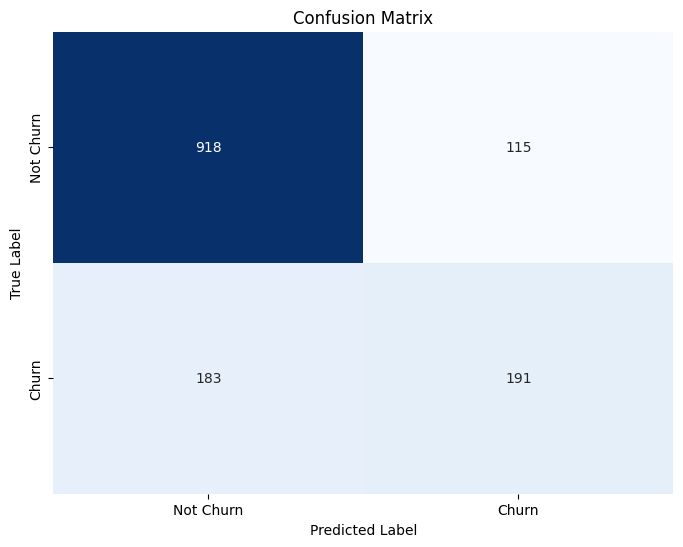

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Model 2: Decision Tree**



## **Before Pruning**

In [ ]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
print(df['Churn'].isna().sum())

0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Convert all Yes/No variables to 1/0
binary_var = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for var in binary_var:
  df[var]=df[var].map({'Yes': 1, 'No': 0})

# Convert Gender (Male/Female) to 1/0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Partition Data
df = pd.get_dummies(df, drop_first=False)
X_churn = df.drop('Churn', axis =1)
y_churn = df['Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X_churn, y_churn,
                                                      test_size=0.1,
                                                      stratify = y_churn,
                                                      random_state=1)

# Build Classification Tree
telco_decisiontree = DecisionTreeClassifier(random_state = 1)
telco_decisiontree.fit(X_train, y_train)

# Evaluate Model
pred_valid = telco_decisiontree.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, pred_valid)
print("confusion matrix: \n", conf_matrix) # Confusion Matrix
print("classification report: \n", classification_report(y_valid, pred_valid))


confusion matrix: 
 [[425  92]
 [ 95  92]]
classification report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       517
           1       0.50      0.49      0.50       187

    accuracy                           0.73       704
   macro avg       0.66      0.66      0.66       704
weighted avg       0.73      0.73      0.73       704



# **After Pruning**

--- Decision Rules (Pruned, Max Depth=5) ---
|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 93.78
|   |   |--- Contract_One year <= 0.50
|   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- SeniorCitizen >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |   |--- PaperlessBilling <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PaperlessBilling >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Contract_One year >  0.50
|   |   |   |--- StreamingMovies_Yes <= 0.50
|   |   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- StreamingMovies_Yes >  0.50
|   |   |   |   |--- StreamingTV_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Str

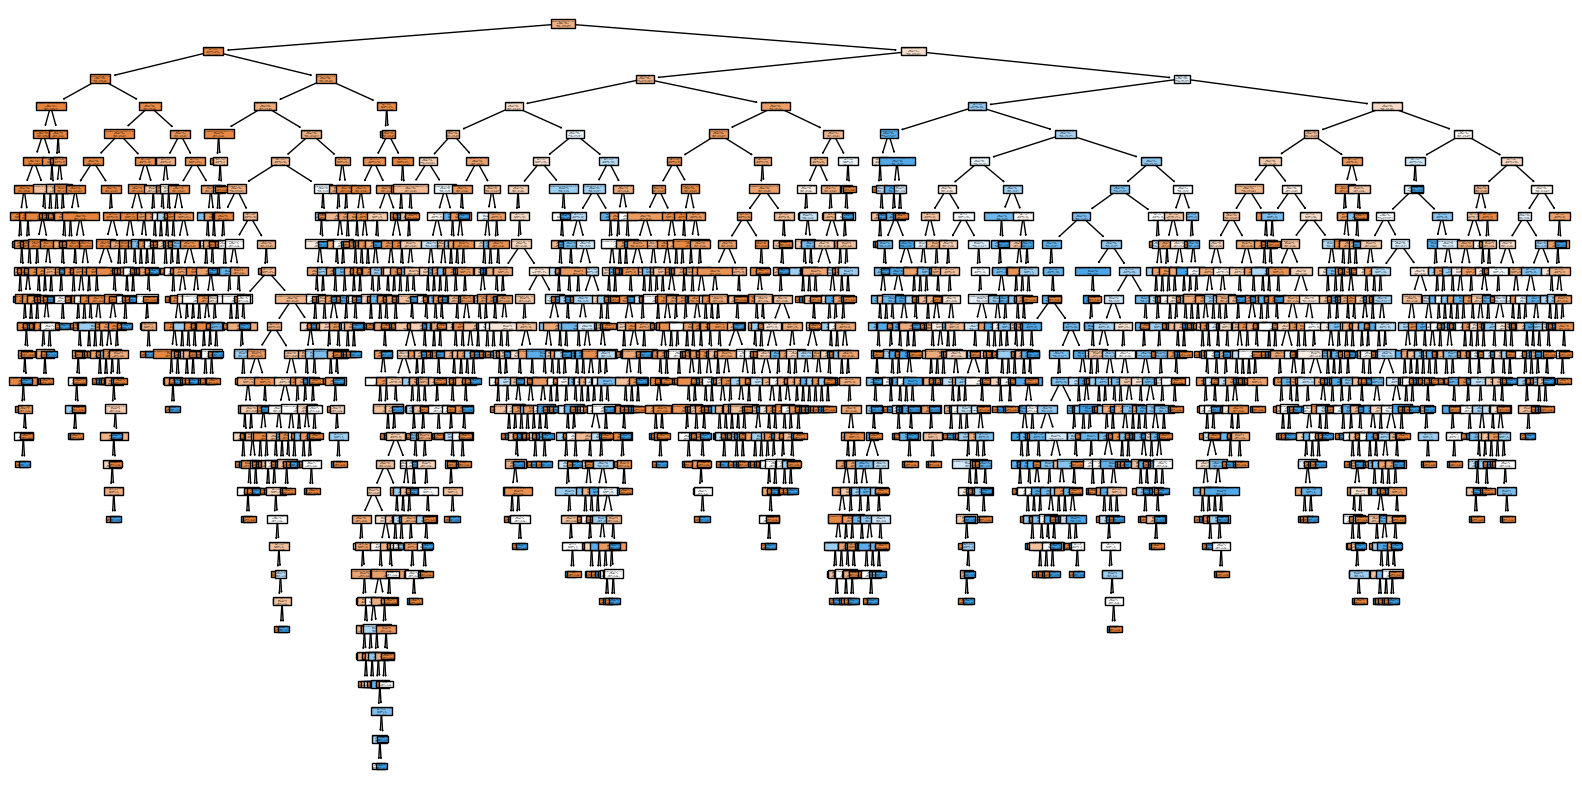

In [ ]:
# --- Build PRUNED Classification Tree ---

# **Pruning added:** max_depth and min_samples_leaf limit the tree's complexity
telco_decisiontree_pruned = DecisionTreeClassifier(random_state=1,
                                                   max_depth=5,       # Pruning: Limit the depth of the tree
                                                   min_samples_leaf=30) # Pruning: Ensure adequate samples per leaf
telco_decisiontree_pruned.fit(X_train, y_train)

# --- Display Decision Rules ---

# Export the text rules for the pruned model
tree_rules = export_text(telco_decisiontree_pruned, feature_names=list(X_train.columns))
print("--- Decision Rules (Pruned, Max Depth=5) ---")
print(tree_rules)

# --- Evaluate Model ---

pred_valid = telco_decisiontree_pruned.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, pred_valid)

print("\n--- Confusion Matrix (Pruned Model) ---")
print(conf_matrix)

print("\n--- Classification Report (Pruned Model) ---")
print(classification_report(y_valid, pred_valid))


# Build Classification Tree
telco_decisiontree_pruned = DecisionTreeClassifier(random_state = 1)
telco_decisiontree_pruned.fit(X_train, y_train)

# Plot Tree
plt.figure(figsize=(20,10))
plot_tree(telco_decisiontree_pruned, feature_names=X_train.columns,
          class_names=['No Churn', 'Churn'],
          filled=True)
plt.show()

##**Decision Tree Confusion Matrix**

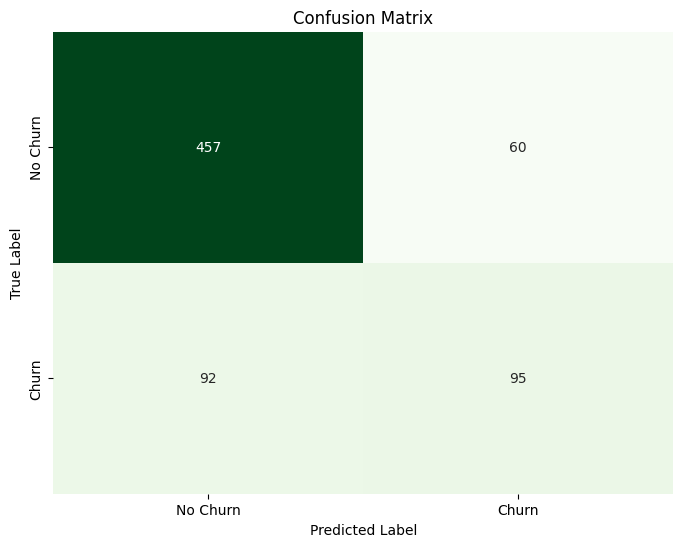

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Model 3: KNN**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Convert categorical features to numerical
df_processed = pd.get_dummies(df, drop_first=True)

# Assuming 'Churn_Yes' is the target variable after one-hot encoding
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn'].astype(int)

num_features = X.select_dtypes(include=['int64', 'float64', 'uint8', 'bool']).columns
cat_features = X.select_dtypes(include=['object']).columns # Should be empty after get_dummies

# 0) 60:40 split (R used set.seed(1); sklearn uses random_state)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.40, random_state=1, stratify=y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_s, y_train)
knn5_pred = knn5.predict(X_valid_s)

print("kNN (k=5) accuracy:", accuracy_score(y_valid, knn5_pred))
print(classification_report(y_valid, knn5_pred, digits=4))



kNN (k=5) accuracy: 0.8201208674013508
              precision    recall  f1-score   support

           0     0.8696    0.8881    0.8788      2065
           1     0.6719    0.6324    0.6515       748

    accuracy                         0.8201      2813
   macro avg     0.7707    0.7602    0.7651      2813
weighted avg     0.8170    0.8201    0.8183      2813



#**KNN Confusion Matrix**

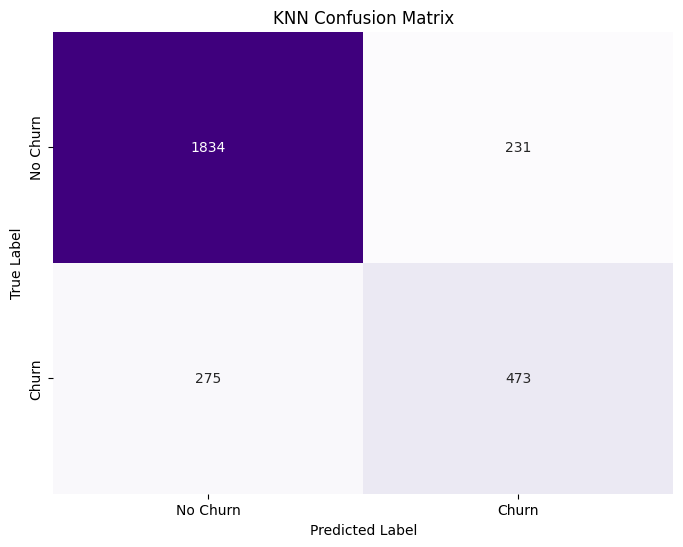

     k  accuracy
0    1  0.942055
1    2  0.844650
2    3  0.837185
3    4  0.827231
4    5  0.820121
5    6  0.820832
6    7  0.812300
7    8  0.812656
8    9  0.808745
9   10  0.809101
10  11  0.802702
11  12  0.803768
12  13  0.801280
13  14  0.803057
14  15  0.800924


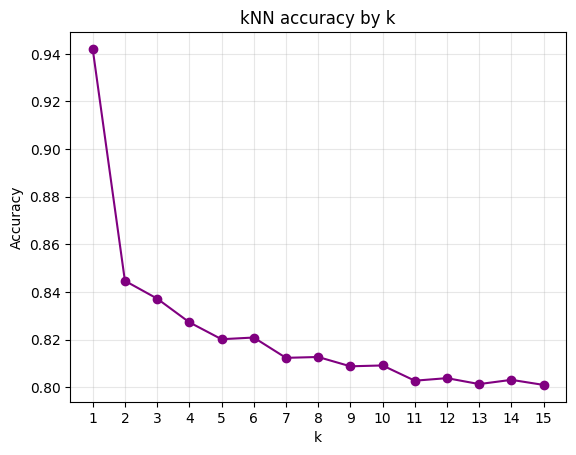

Best k: 1 (accuracy=0.9421)


In [ ]:
# Calculate the confusion matrix for the KNN model
conf_matrix = confusion_matrix(y_valid, knn5_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Find optimal k in 1..15
accs = []
for k in range(1, 16):
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train_s, y_train)
    pred = m.predict(X_valid_s)
    accs.append((k, accuracy_score(y_valid, pred)))

accuracy_df = pd.DataFrame(accs, columns=["k", "accuracy"])
print(accuracy_df)


plt.plot(accuracy_df["k"], accuracy_df["accuracy"], marker="o", color='purple')
plt.xticks(range(1,16))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("kNN accuracy by k")
plt.grid(True, alpha=0.3)
plt.show()

best_k, best_acc = max(accs, key=lambda t: t[1])
print(f"Best k: {best_k} (accuracy={best_acc:.4f})")